In [40]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from pyod.models.base import BaseDetector
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

In [41]:
# generate train and test data
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.15)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 3), (300,), (200, 3), (200,))

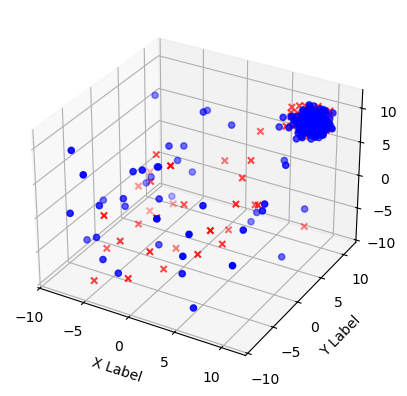

In [48]:
# plot 3d data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='b', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='r', marker='x')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [57]:
def plot_data(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title(title)
    plt.show()
    

In [61]:
def test_model(model_type: BaseDetector, model_args: dict, train_data, train_labels, test_data, test_labels):
    model = model_type(**model_args)
    model.fit(train_data)

    y_test_pred = model.predict(test_data)
    balanced_acc = balanced_accuracy_score(test_labels, y_test_pred)
    roc_auc_acc = roc_auc_score(test_labels, y_test_pred)
    
    print(f"Balanced accuracy: {balanced_acc}")
    print(f"ROC AUC score: {roc_auc_acc}")
    
    plot_data(test_data, y_test_pred, 'Predictions')
    plot_data(test_data, test_labels, 'Ground truth')
    

Balanced accuracy: 1.0
ROC AUC score: 1.0


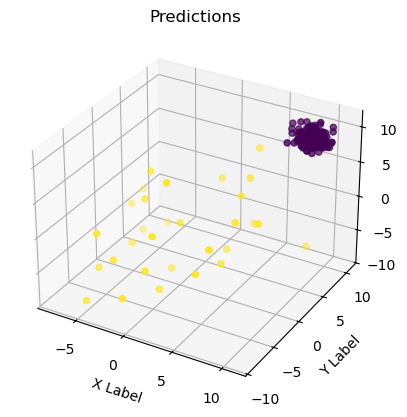

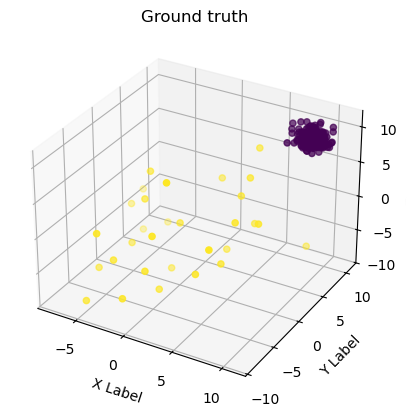

Balanced accuracy: 0.9970588235294118
ROC AUC score: 0.9970588235294118


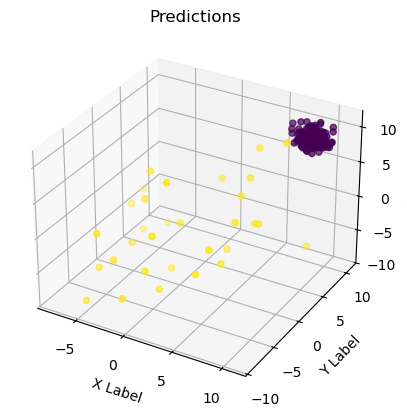

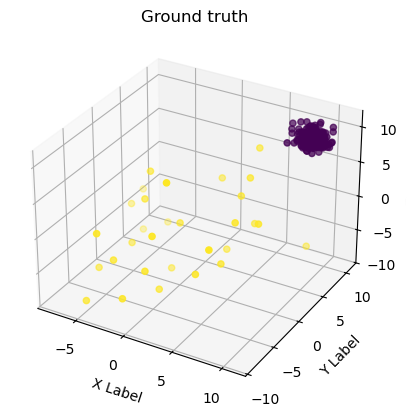

Balanced accuracy: 0.9323529411764706
ROC AUC score: 0.9323529411764706


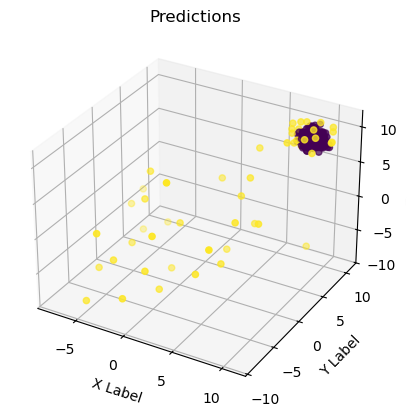

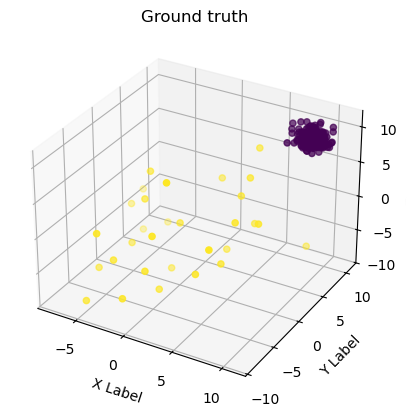

Epoch 1/10, Loss: 7.552987650036812
Epoch 2/10, Loss: 8.108597099781036
Epoch 3/10, Loss: 7.884120136499405
Epoch 4/10, Loss: 8.391104727983475
Epoch 5/10, Loss: 8.037898510694504
Epoch 6/10, Loss: 7.79330986738205
Epoch 7/10, Loss: 7.5680254101753235
Epoch 8/10, Loss: 7.932787120342255
Epoch 9/10, Loss: 7.827281653881073
Epoch 10/10, Loss: 8.41539317369461
Balanced accuracy: 0.9637254901960784
ROC AUC score: 0.9637254901960784


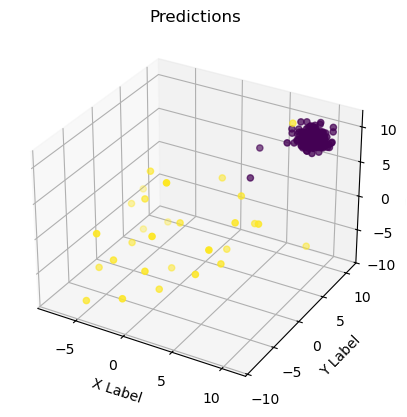

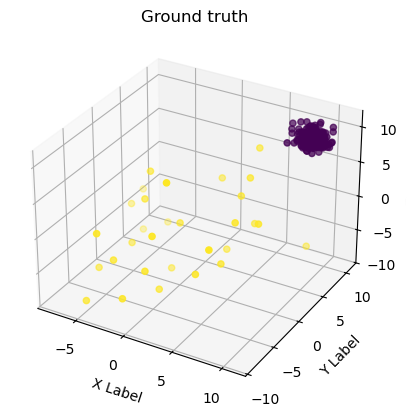

In [62]:
test_model(OCSVM, {'contamination': 0.15, 'kernel': 'linear'}, X_train, y_train, X_test, y_test)
test_model(OCSVM, {'contamination': 0.15, 'kernel': 'rbf'}, X_train, y_train, X_test, y_test)
test_model(OCSVM, {'contamination': 0.30, 'kernel': 'rbf'}, X_train, y_train, X_test, y_test)
test_model(DeepSVDD, {'contamination': 0.15, 'n_features': 3, 'epochs': 10}, X_train, y_train, X_test, y_test)